In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('L://jupytar//owid-covid-data.csv')

In [3]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Gu

In [4]:
s = input("Enter Country from above list: ")

Enter Country from above list: France


In [5]:
country = df[df['location']== s][['date' , 'new_cases']]
country

,date,new_cases
21936,2020-01-24,2.0
21937,2020-01-25,1.0
21938,2020-01-26,0.0
21939,2020-01-27,0.0
21940,2020-01-28,1.0
...,...,...
22310,2021-02-01,4388.0
22311,2021-02-02,23337.0
22312,2021-02-03,26406.0
22313,2021-02-04,20.0


In [6]:
country.set_index('date' , inplace=True)

<AxesSubplot:xlabel='date'>

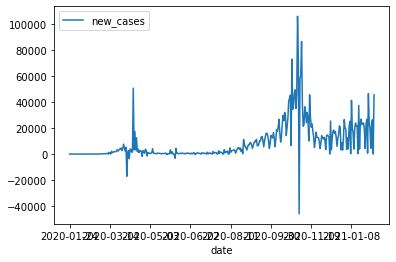

In [7]:
country.plot()

In [8]:
country.dropna(inplace=True)

<AxesSubplot:xlabel='date'>

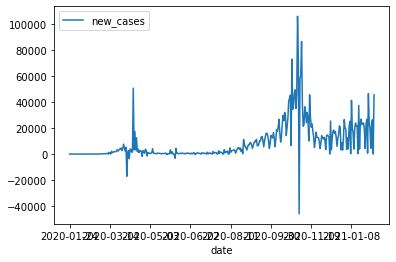

In [9]:
country.plot()

In [10]:
country

,new_cases
date,
2020-01-24,2.0
2020-01-25,1.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,1.0
...,...
2021-02-01,4388.0
2021-02-02,23337.0
2021-02-03,26406.0


In [11]:
country.sort_values('date' , ascending = True , inplace=True)

In [12]:
country

,new_cases
date,
2020-01-24,2.0
2020-01-25,1.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,1.0
...,...
2021-02-01,4388.0
2021-02-02,23337.0
2021-02-03,26406.0


In [13]:
country.describe()

,new_cases
count,379.000000
mean,8854.031662
std,14394.391434
min,-46076.000000
25%,411.000000
50%,2923.000000
75%,13026.000000
max,106091.000000


<AxesSubplot:xlabel='date'>

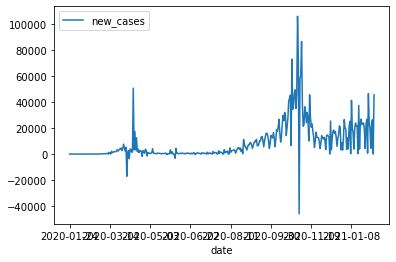

In [14]:
country.plot()

In [15]:
smth_cnt = pd.concat([country , country.shift(1)] , axis = 1)

In [16]:
smth_cnt.columns = ['original' , 'predicted']

In [17]:
smth_cnt = smth_cnt.iloc[1:]

In [18]:
smth_cnt

,original,predicted
date,,
2020-01-25,1.0,2.0
2020-01-26,0.0,1.0
2020-01-27,0.0,0.0
2020-01-28,1.0,0.0
2020-01-29,1.0,1.0
...,...,...
2021-02-01,4388.0,19235.0
2021-02-02,23337.0,4388.0
2021-02-03,26406.0,23337.0


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [20]:
np.sqrt(mean_squared_error(smth_cnt['original'] , smth_cnt['predicted']))

13453.39326533837

In [21]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

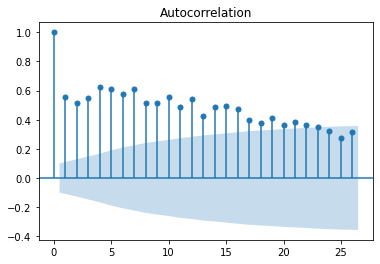

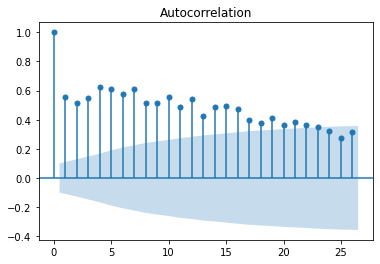

In [22]:
plot_acf(country)

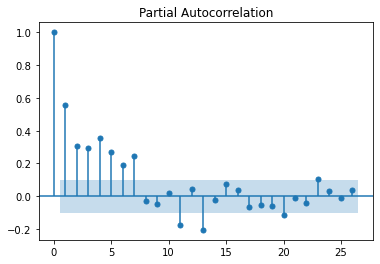

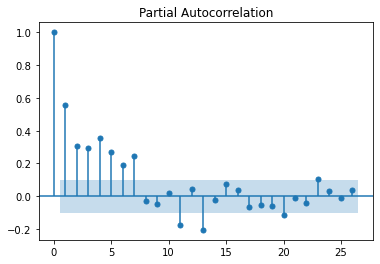

In [23]:
plot_pacf(country)

In [24]:
lg = country.shape[0]

In [25]:
breakpoint = (3*lg)//4
train = country.iloc[0:breakpoint]
test = country.iloc[breakpoint:]

In [26]:
train

,new_cases
date,
2020-01-24,2.0
2020-01-25,1.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,1.0
...,...
2020-10-29,46612.0
2020-10-30,49474.0
2020-10-31,35070.0


In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
p = int(input("enter 'p': "))
q = int(input("enter 'q': "))

enter 'p': 4
enter 'q': 1


In [29]:
try:
    model = ARIMA(train , order = (p ,0 ,q))  
    model_fit = model.fit()
    i = 0
except Exception as e:
    model = ARIMA(train , order = (p ,1 ,q))  
    model_fit = model.fit()
    i = 1
finally:
    print(f'i is {i}')

C:\Users\Arpit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Arpit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

i is 1


C:\Users\Arpit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [30]:
model_fit.aic

5797.720915918053

In [31]:
length = test.shape[0]

In [32]:
test.shape

(95, 1)

In [33]:
pre = model_fit.forecast(steps = length)[0]

In [34]:
np.sqrt(mean_squared_error(test , pre))

62217.55174390144

In [35]:
pred = pd.DataFrame(pre , index=test.index)

In [36]:
final = pd.merge(pred , test , how = 'inner' , on = 'date')

In [37]:
final.columns = ['predicted' , 'Original']

In [38]:
final['variation'] = abs(final['Original'] - final['predicted'])

In [39]:
final

,predicted,Original,variation
date,,,
2020-11-03,52729.094724,72601.0,19871.905276
2020-11-04,61552.316613,-46076.0,107628.316613
2020-11-05,70198.139324,57806.0,12392.139324
2020-11-06,73586.958351,60952.0,12634.958351
2020-11-07,62354.319464,86655.0,24300.680536
...,...,...,...
2021-02-01,88458.948871,4388.0,84070.948871
2021-02-02,88696.740554,23337.0,65359.740554
2021-02-03,88934.532237,26406.0,62528.532237


<AxesSubplot:xlabel='date'>

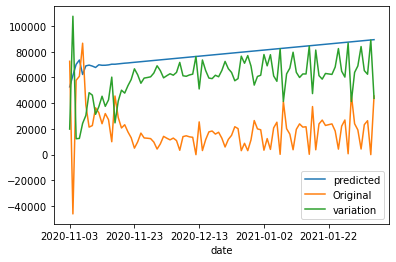

In [40]:
final.plot()

# normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler(feature_range = (0,1))

In [43]:
scaler.fit(train)

MinMaxScaler()

In [44]:
scaler.data_min_

array([-17074.])

In [45]:
scaler.data_max_

array([106091.])

In [46]:
train_norm = scaler.transform(train)

In [47]:
for ele in train_norm:
    print(ele)

[0.13864328]
[0.13863516]
[0.13862705]
[0.13862705]
[0.13863516]
[0.13863516]
[0.13862705]
[0.13862705]
[0.13863516]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13866764]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13863516]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13862705]
[0.13864328]
[0.13865952]
[0.13878943]
[0.13878131]
[0.13897617]
[0.13887062]
[0.13912232]
[0.13879755]
[0.1392441]
[0.13974749]
[0.14016969]
[0.14132262]
[0.14006414]
[0.14094913]
[0.14164738]
[0.14276783]
[0.13862705]
[0.14989648]
[0.14524418]
[0.13891934]
[0.15609142]
[0.14700605]
[0.15006698]
[0.15361507]
[0.15314416]
[0.15247026]
[0.15726059]
[0.16594812]
[0.1568871]
[0.16267608]
[0.17043803]
[0.16943937]
[0.17634068]
[0.1597613]
[0.173978]
[0.20056834]
[0.1779564]
[0.15572606]
[0.18104169]
[0.]
[0.14556895]
[0.16017537]
[0.11028295]
[0.16992652]
[0.16935006]
[0.15133358]


In [48]:
try:
    model = ARIMA(train_norm , order = (p ,0 ,q))  
    model_fit = model.fit()
    i = 0
except Exception as e:
    model = ARIMA(train_norm , order = (p ,1 ,q))  
    model_fit = model.fit()
    i = 1
finally:
    print(f'i is {i}')

C:\Users\Arpit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Arpit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

i is 1


C:\Users\Arpit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [49]:
model_fit.aic

-836.5237088979111

In [52]:
pre_nm_tf = model_fit.forecast(steps = length)[0]

In [55]:
pre_nm_tf = pre_nm_tf.reshape(length,1)

In [56]:
pre_nm = scaler.inverse_transform(pre_nm_tf)

In [58]:
pred_nm = pd.DataFrame(pre_nm , index=test.index)

In [59]:
final_nm = pd.merge(pred_nm , test , how = 'inner' , on = 'date')

In [60]:
final_nm.columns = ['predicted_nm' , 'Original_nm']

In [61]:
final_nm['variation_nm'] = abs(final_nm['Original_nm'] - final_nm['predicted_nm'])

In [62]:
final_nm

,predicted_nm,Original_nm,variation_nm
date,,,
2020-11-03,52725.937816,72601.0,19875.062184
2020-11-04,61548.896517,-46076.0,107624.896517
2020-11-05,70194.314068,57806.0,12388.314068
2020-11-06,73582.413376,60952.0,12630.413376
2020-11-07,62348.535586,86655.0,24306.464414
...,...,...,...
2021-02-01,88380.673240,4388.0,83992.673240
2021-02-02,88617.620661,23337.0,65280.620661
2021-02-03,88854.568083,26406.0,62448.568083


<AxesSubplot:xlabel='date'>

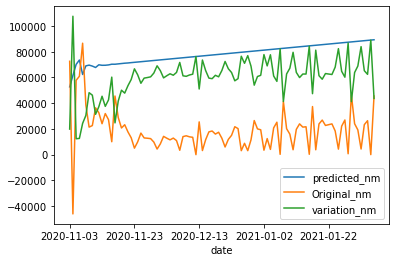

In [63]:
final_nm.plot()